# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.backend import backend
from keras.datasets import cifar10


import warnings
warnings.filterwarnings("ignore")

Using Theano backend.


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Label: [6]


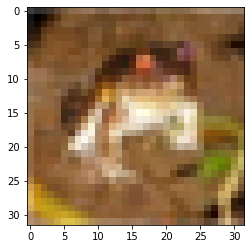

In [3]:
print("Label: {}".format(y_train[0]))
plt.imshow(X_train[0], cmap='gray')

In [4]:
def split_data(source_x, source_y):
    target_x_1=[]
    target_y_1=[]
    target_x_2=[]
    target_y_2=[]
    for i,v in enumerate(source_y):
        if v < 5:
            target_x_1.append(source_x[i])
            target_y_1.append(v)
        else:
            target_x_2.append(source_x[i])
            target_y_2.append(v)
    return ((np.array(target_x_1), np.array(target_y_1)), (np.array(target_x_2), np.array(target_y_2)))

In [5]:
(X_train_1, y_train_1), (X_train_2, y_train_2) = split_data(X_train, y_train)
(X_test_1, y_test_1), (X_test_2, y_test_2) = split_data(X_test, y_test)

In [6]:
print(f'X_train_1 shape (0-4): {X_train_1.shape}\nX_test_1 shape (0-4): {X_test_1.shape}\nX_train_2 shape (5-9): {X_train_2.shape}\nX_test_2 shape (5-9): {X_test_2.shape}')

X_train_1 shape (0-4): (25000, 32, 32, 3)
X_test_1 shape (0-4): (5000, 32, 32, 3)
X_train_2 shape (5-9): (25000, 32, 32, 3)
X_test_2 shape (5-9): (5000, 32, 32, 3)


Since the shape is already 4-dim, we do not want to reshape again

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [7]:
y_train_1 = keras.utils.to_categorical(y_train_1, 5)
y_test_1 = keras.utils.to_categorical(y_test_1, 5)
# Subtracting 5 to generate values 0 - 5 instead of 5 - 9
y_train_2 = keras.utils.to_categorical(y_train_2 - 5, 5)
y_test_2 = keras.utils.to_categorical(y_test_2 - 5, 5)

In [8]:
X_train_1 = X_train_1.astype('float32')
X_train_2 = X_train_2.astype('float32')
X_test_1 = X_test_1.astype('float32')
X_test_2 = X_test_2.astype('float32')

#Normalizing the input
X_train_1 /= 255
X_train_2 /= 255
X_test_1 /= 255
X_test_2 /= 255

print(f'X_train_1 shape (0-4): {X_train_1.shape}\nX_test_1 shape (0-4): {X_test_1.shape}\nX_train_2 shape (5-9): {X_train_2.shape}\nX_test_2 shape (5-9): {X_test_2.shape}')

X_train_1 shape (0-4): (25000, 32, 32, 3)
X_test_1 shape (0-4): (5000, 32, 32, 3)
X_train_2 shape (5-9): (25000, 32, 32, 3)
X_test_2 shape (5-9): (5000, 32, 32, 3)


In [9]:
print(f'Total number of Train values (0-4): {len(y_train_1)}\nTotal number of Test values (0-4): {len(y_test_1)}\nTotal number of Train values(5-9): {len(y_train_2)}\nTotal number of Test values(5-9): {len(y_test_2)}')

Total number of Train values (0-4): 25000
Total number of Test values (0-4): 5000
Total number of Train values(5-9): 25000
Total number of Test values(5-9): 5000


### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [23]:
input_shape = (32, 32, 3)
#Initialize the model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='conv_1'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_1'))
model.add(keras.layers.Dropout(0.2,name='drop_1'))
model.add(keras.layers.BatchNormalization())

# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='conv_2'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_2'))
# model.add(keras.layers.Dropout(0.2,name='drop_2'))
# model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='conv_3'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_3'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='conv_4'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_4'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu',name='dense_1'))
model.add(keras.layers.Dropout(0.2,name='drop_2'))

model.add(keras.layers.Dense(5, activation='softmax',name='dense_2'))

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 15, 15, 32)        128       
_________________________________________________________________
conv_3 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
max_3 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 6, 6, 64)         

In [25]:
from keras.losses import categorical_crossentropy

#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

In [26]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [27]:
model.fit(X_train_1, y_train_1,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_test_1, y_test_1),
          callbacks=callback_list)

Train on 25000 samples, validate on 5000 samples
Epoch 1/50
25000/25000 [==============================] - 181s 7ms/step - loss: 1.0857 - accuracy: 0.5690 - val_loss: 1.6748 - val_accuracy: 0.4520
Epoch 2/50
25000/25000 [==============================] - 190s 8ms/step - loss: 0.8417 - accuracy: 0.6682 - val_loss: 1.7281 - val_accuracy: 0.4404
Epoch 3/50
25000/25000 [==============================] - 178s 7ms/step - loss: 0.7475 - accuracy: 0.7122 - val_loss: 0.7774 - val_accuracy: 0.6956
Epoch 4/50
25000/25000 [==============================] - 178s 7ms/step - loss: 0.6752 - accuracy: 0.7417 - val_loss: 0.8615 - val_accuracy: 0.6870
Epoch 5/50
25000/25000 [==============================] - 178s 7ms/step - loss: 0.6247 - accuracy: 0.7614 - val_loss: 0.9696 - val_accuracy: 0.6524
Epoch 6/50
25000/25000 [==============================] - 178s 7ms/step - loss: 0.5855 - accuracy: 0.7803 - val_loss: 0.8097 - val_accuracy: 0.6942
Epoch 7/50
25000/25000 [==============================] - 181s 

In [28]:
score = model.evaluate( X_test_1, y_test_1)

5000/5000 [==============================] - 15s 3ms/step


In [29]:
print(f'Accuracy of the model is: {score}')

Accuracy of the model is: [0.676528856754303, 0.7897999882698059]


### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [30]:
for layer in model.layers:
  if('dense' not in layer.name):
    layer.trainable = False

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 15, 15, 32)        128       
_________________________________________________________________
conv_3 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
max_3 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 6, 6, 64)         

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [31]:
model.fit(X_train_2, y_train_2,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_test_2, y_test_2),
          callbacks=callback_list)

Train on 25000 samples, validate on 5000 samples
Epoch 1/50
25000/25000 [==============================] - 327s 13ms/step - loss: 1.5213 - accuracy: 0.3316 - val_loss: 1.2195 - val_accuracy: 0.4832
Epoch 2/50
25000/25000 [==============================] - 182s 7ms/step - loss: 1.1638 - accuracy: 0.5156 - val_loss: 0.9650 - val_accuracy: 0.6362
Epoch 3/50
25000/25000 [==============================] - 181s 7ms/step - loss: 0.8909 - accuracy: 0.6587 - val_loss: 0.7527 - val_accuracy: 0.7406
Epoch 4/50
25000/25000 [==============================] - 183s 7ms/step - loss: 0.7107 - accuracy: 0.7334 - val_loss: 0.5900 - val_accuracy: 0.7920
Epoch 5/50
25000/25000 [==============================] - 185s 7ms/step - loss: 0.6061 - accuracy: 0.7838 - val_loss: 0.5718 - val_accuracy: 0.7914
Epoch 6/50
25000/25000 [==============================] - 183s 7ms/step - loss: 0.5237 - accuracy: 0.8157 - val_loss: 0.7280 - val_accuracy: 0.7698
Epoch 7/50
25000/25000 [==============================] - 183s

In [32]:
model.evaluate( X_test_2, y_test_2)

5000/5000 [==============================] - 18s 4ms/step


[0.5539651023864746, 0.8307999968528748]

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [19]:
from sklearn.datasets import fetch_20newsgroups

In [20]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [21]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [22]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [23]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [24]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [25]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# TfidfVectorizer
vect = TfidfVectorizer()
X_train_dtm = vect.fit_transform(twenty_train.data)
X_test_dtm = vect.transform(twenty_test.data)

In [41]:
X_train_dtm

<2257x35788 sparse matrix of type '<class 'numpy.float64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [45]:
import pandas as pd
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.29521,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.055283,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.095199,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_test_dtm

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
logreg.fit(X_train_dtm, twenty_train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = logreg.predict(X_test_dtm)

In [44]:
from sklearn import metrics
metrics.accuracy_score(twenty_test.target, y_pred)

0.8868175765645806